Capital Asset Pricing Model (CAPM): A model used to determine the expected return of an asset given its risk and the risk-free rate. It assumes that investors hold a diversified portfolio and that the expected return on an asset is proportional to its beta, or sensitivity to the market.

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define start and end dates and stock ticker
start_date = '2021-03-13'
end_date = '2023-03-13'
ticker = 'RELIANCE.NS'

# Get stock data and market data from Yahoo Finance
stock_data = yf.download(ticker, start=start_date, end=end_date)
market_data = yf.download('^NSEI', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Calculate daily returns and drop missing data
daily_returns = stock_data['Adj Close'].pct_change().dropna()
market_returns = market_data['Adj Close'].pct_change().dropna()

### CAPM is calculated according to the following:

Ra = Rrf + [Ba*(Rm - Rfr)]

Where:

- Ra = Expected return on a security
- Rrf = Risk-free rate
- Ba = Beta of the security
- Rm = Expected return of the market

In [4]:
# Calculate beta
beta = np.cov(daily_returns, market_returns)[0, 1] / np.var(market_returns)

In [5]:
# Calculate expected return using CAPM formula
risk_free_rate = 0.05
market_return = market_returns.mean()
expected_return = risk_free_rate + beta * (market_return - risk_free_rate)

In [6]:
# Print results
print('Beta for', ticker, ':', beta)
print('Expected return for', ticker, ':', expected_return)

Beta for RELIANCE.NS : 1.107018104540384
Expected return for RELIANCE.NS : -0.004953181573508755


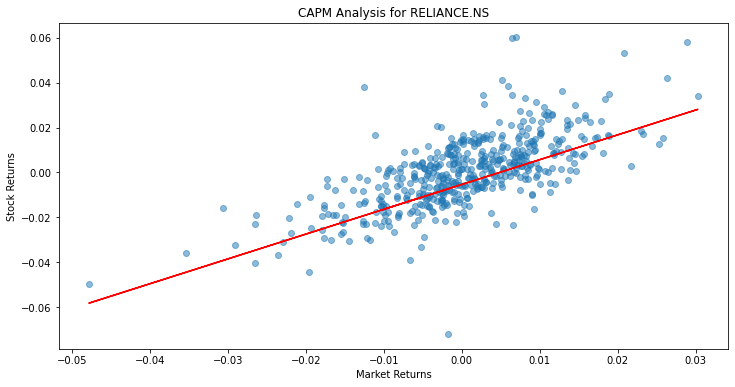

In [7]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(market_returns, daily_returns, alpha=0.5)

# Add labels and title
plt.xlabel('Market Returns')
plt.ylabel('Stock Returns')
plt.title('CAPM Analysis for ' + ticker)

# Add regression line
plt.plot(market_returns, beta * market_returns + (expected_return - beta * market_return), color='red')

# Show the plot
plt.show()